In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [13]:
df = pd.read_csv('conposcovidloc.csv', index_col=0, parse_dates=True, squeeze=True)
df

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
Row_ID,,,,,,,,,,,,,,,,,
1,2019-05-30,2020-05-05,2020-05-05,2020-05-03,50s,FEMALE,CC,Resolved,NaN,2260,Simcoe Muskoka District Health Unit,15 Sperling Drive,Barrie,L4M 6K9,www.simcoemuskokahealth.org,44.410713,-79.686306
2,2019-11-20,2020-10-21,2020-11-21,2019-11-20,20s,FEMALE,NO KNOWN EPI LINK,Resolved,NaN,4913,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
3,2020-01-01,2020-04-24,2020-04-24,2020-04-23,80s,MALE,NO KNOWN EPI LINK,Resolved,NaN,2234,Haldimand-Norfolk Health Unit,12 Gilbertson Drive,Simcoe,N3Y 4N5,www.hnhu.org,42.847825,-80.303815
4,2020-01-01,2020-05-17,2020-05-17,2020-05-15,50s,MALE,CC,Resolved,NaN,2265,"Region of Waterloo, Public Health",99 Regina Street South,Waterloo,N2J 4V3,www.regionofwaterloo.ca,43.462876,-80.520913
5,2020-01-01,2021-05-26,2021-03-31,2021-03-28,UNKNOWN,MALE,TRAVEL,Resolved,NaN,2263,Timiskaming Health Unit,"247 Whitewood Avenue, Unit 43",New Liskeard,P0J 1P0,www.timiskaminghu.com,47.509284,-79.681632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574615,2021-09-10,2021-09-11,2021-09-11,2021-09-10,<20,UNSPECIFIED,MISSING INFORMATION,Not Resolved,NaN,2230,Durham Region Health Department,605 Rossland Road East,Whitby,L1N 0B2,www.durham.ca/en/health-and-wellness/health-an...,43.898605,-78.940341
574616,2021-09-10,2021-09-11,2021-09-11,2021-09-10,<20,UNSPECIFIED,MISSING INFORMATION,Not Resolved,NaN,2260,Simcoe Muskoka District Health Unit,15 Sperling Drive,Barrie,L4M 6K9,www.simcoemuskokahealth.org,44.410713,-79.686306
574617,2021-09-11,2021-09-11,2021-09-11,2021-09-11,40s,FEMALE,MISSING INFORMATION,Not Resolved,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


In [15]:
df.dtypes

Accurate_Episode_Date         object
Case_Reported_Date            object
Test_Reported_Date            object
Specimen_Date                 object
Age_Group                     object
Client_Gender                 object
Case_AcquisitionInfo          object
Outcome1                      object
Outbreak_Related              object
Reporting_PHU_ID               int64
Reporting_PHU                 object
Reporting_PHU_Address         object
Reporting_PHU_City            object
Reporting_PHU_Postal_Code     object
Reporting_PHU_Website         object
Reporting_PHU_Latitude       float64
Reporting_PHU_Longitude      float64
dtype: object

In [20]:
df['datetime-Case_Reported_Date'] = pd.to_datetime(df['Case_Reported_Date'], format='%Y-%m-%d')

In [24]:
df['ordinal'] = [x.toordinal() for x in df['datetime-Case_Reported_Date']]

Text(0.5, 1.0, 'Density Plot of Covid-19 Cases in Ontario Categorized by Age Group')

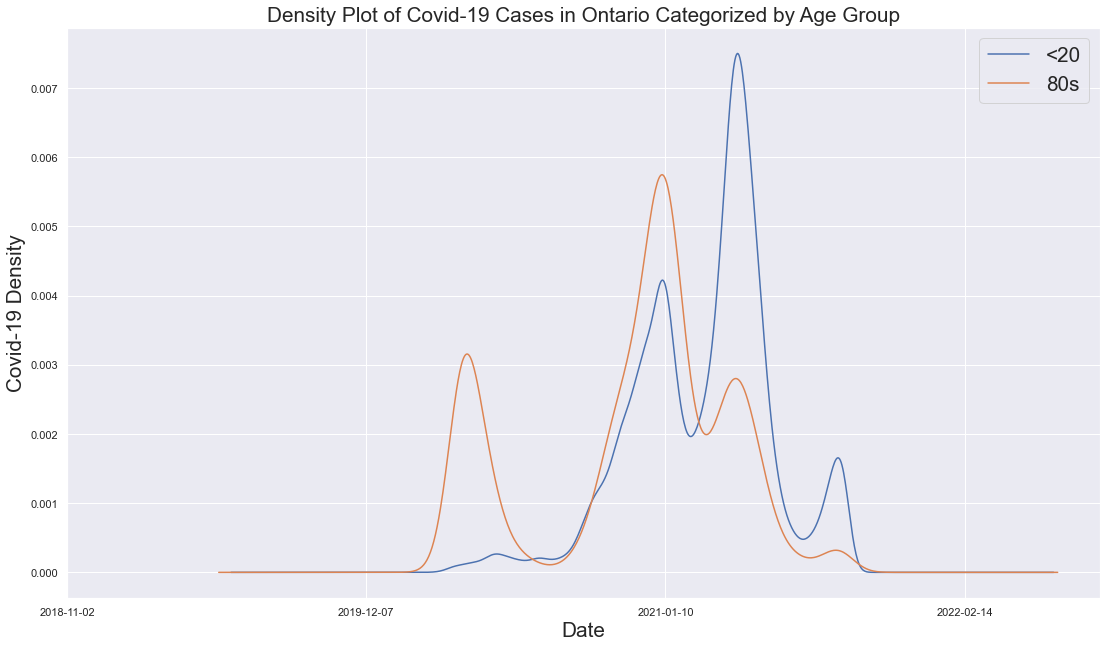

In [86]:
sns.set_theme()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax = df[df['Age_Group'] == '<20']['ordinal'].plot(kind='kde', label = '<20')
#ax1 = df[df['Age_Group'] == '20s']['ordinal'].plot(kind='kde', label = '20s')
#ax2 = df[df['Age_Group'] == '30s']['ordinal'].plot(kind='kde', label = '30s')
#ax3 = df[df['Age_Group'] == '40s']['ordinal'].plot(kind='kde', label = '40s')
#ax4 = df[df['Age_Group'] == '50s']['ordinal'].plot(kind='kde', label = '50s')
#ax5 = df[df['Age_Group'] == '60s']['ordinal'].plot(kind='kde', label = '60s')
#ax6 = df[df['Age_Group'] == '70s']['ordinal'].plot(kind='kde', label = '70s')
ax7 = df[df['Age_Group'] == '80s']['ordinal'].plot(kind='kde', label = '80s')
x_ticks = ax.get_xticks()
ax.set_xticks(x_ticks[::2])
xlabels = [datetime.date.fromordinal(int(x)).strftime('%Y-%m-%d') for x in x_ticks[::2]]
ax.set_xticklabels(xlabels)
ax.set_ylabel('Covid-19 Density', fontsize = 'xx-large')
ax.set_xlabel('Date', fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.title('Density Plot of Covid-19 Cases in Ontario Categorized by Age Group', fontsize = 'xx-large')

During the first and second outbreaks of Covid-19 in Ontario, most of the cases were reported from people in the '80s' age group compared to people in the '<20' age group. This relation is reverted for the last two outbreaks in the province.